import locale
#locale.setlocale(locale.LC_TIME,'ko_KR.UTF-8')
locale.setlocale(locale.LC_ALL, 'ko_KR')

locale.getlocale(locale.LC_TIME)

In [1]:
import pandas as pd
import numpy as np
import os
import datetime as dt

import emoji

import matplotlib.pyplot as plt

import urllib.request

In [2]:
import konlpy

from konlpy.tag import Kkma
from konlpy.utils import pprint
kkma = Kkma()

In [3]:
print(kkma.nouns('질문이나 건의사항은 깃헙 이슈 트래커에 남겨주세요.'))

['질문', '건의', '건의사항', '사항', '깃헙', '이슈', '트래커']


In [4]:
file = r"/Users/reejungkim/Documents/Git/WebCrawler/GooglePlayStore_Review_FB2021-02-18-17:02:13.csv"

In [5]:
df = pd.read_csv(file, index_col=None)

In [6]:
df.head()

,Unnamed: 0,author,developer_reply,review,review_date,reviewer_ratings,star
0,0,지현우,NaN,한달째 로그인 오류 덕분에 사용하지 못하고 있네요 지인들과 연락도 안되고 이게 뭐...,2021년 2월 14일,51,별표 5개 만점에 1개를 받았습니다.
1,1,감수성art채널,NaN,다른계정 로그인이 안됩니다 본인 비밀번호를 맞게 입력해도 메일주소가 다르게 나오고...,2021년 2월 9일,51,별표 5개 만점에 1개를 받았습니다.
2,2,전지현,NaN,번호가바뀌면서쓰던계정과연동이되지않고잇습니다.로그인코드를문자로보내시는거같은데 이미번...,2021년 1월 22일,51,별표 5개 만점에 1개를 받았습니다.
3,3,윤재형,NaN,"비밀번호를 까먹어서 SMS로 인증코드 확인할려고 ""다음"" 눌렀는데 처음화면으로 돌...",2021년 2월 3일,51,별표 5개 만점에 1개를 받았습니다.
4,4,유진,NaN,제가 이거 한적이 있었는데 깔았다가 지웠거든요 그리고 전화번호도 바꿨어요 그리고 ...,2021년 2월 13일,52,별표 5개 만점에 2개를 받았습니다.


# EDA

In [7]:
df.shape

(200, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        200 non-null    int64  
 1   author            200 non-null    object 
 2   developer_reply   0 non-null      float64
 3   review            200 non-null    object 
 4   review_date       200 non-null    object 
 5   reviewer_ratings  200 non-null    int64  
 6   star              200 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 11.1+ KB


In [9]:
df['review_date'] = df['review_date'].str.replace('년 ','/').str.replace('월 ', '/').str.replace('일', '/')

In [10]:
df['review_date'] = pd.to_datetime(df['review_date'])

In [11]:
df['year-m'] = df['review_date'].dt.strftime('%Y-%m')

In [12]:
df.head(2)

,Unnamed: 0,author,developer_reply,review,review_date,reviewer_ratings,star,year-m
0,0,지현우,NaN,한달째 로그인 오류 덕분에 사용하지 못하고 있네요 지인들과 연락도 안되고 이게 뭐...,2021-02-14,51,별표 5개 만점에 1개를 받았습니다.,2021-02
1,1,감수성art채널,NaN,다른계정 로그인이 안됩니다 본인 비밀번호를 맞게 입력해도 메일주소가 다르게 나오고...,2021-02-09,51,별표 5개 만점에 1개를 받았습니다.,2021-02


df.groupby('review_date')['review'].count()

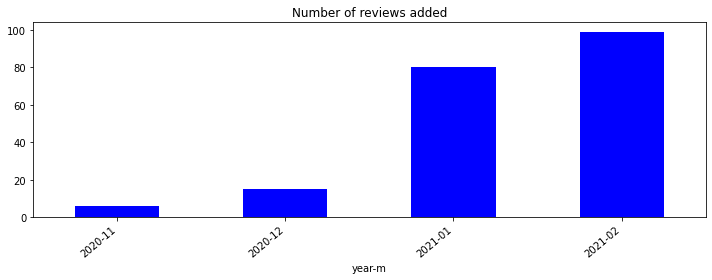

In [13]:
plt.figure(figsize=(10,4))

ax = df.groupby('year-m')['review'].count().plot(kind='bar', color='b')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Number of reviews added')
plt.tight_layout()
plt.show()

df[['star_available','star_received']] = df['star'].str.split('만점에 ',expand=True)

In [14]:
df['star'] = df['star'].str.replace('별표 5개 만점에 ', '').str.replace('개를 받았습니다.', '')

## Clean texts

In [15]:
df.review

0       한달째 로그인 오류 덕분에 사용하지 못하고 있네요 지인들과 연락도 안되고 이게 뭐...
1       다른계정 로그인이 안됩니다 본인 비밀번호를 맞게 입력해도 메일주소가 다르게 나오고...
2       번호가바뀌면서쓰던계정과연동이되지않고잇습니다.로그인코드를문자로보내시는거같은데 이미번...
3       비밀번호를 까먹어서 SMS로 인증코드 확인할려고 "다음" 눌렀는데 처음화면으로 돌...
4       제가 이거 한적이 있었는데 깔았다가 지웠거든요 그리고 전화번호도 바꿨어요 그리고 ...
                             ...                        
195                       로그인이 안돼요 그리고 이상한걸로 영정먹고 도움 안돼요
196     페이스북 사진과 가이드라인을 위반 및 이지만 억울합니다 😔😔😔저의 나머지 부계정도...
197     다른 새 계정을 만들려고 했는데 옛날에 잘못 만든 계정을 삭제했는데 계정이 안만들...
198     프로필 업로드가 안돼요.. 몇일째 그래서 다시 깔아보고 이것저것 해보고 버그 신고...
199     페이스북이 자꾸 지멋대로 팅기는 현상이 나타는데 왜이러는거죠? 지우고 다시깔구해도...
Name: review, Length: 200, dtype: object

In [16]:
def extract_emojis(string):
    emoticon = "".join(c for c in string if c in emoji.UNICODE_EMOJI)
    if emoticon!="":
        return emoticon
    return None

In [17]:
df['emoji']=df['review'].apply(lambda x: extract_emojis(x))

In [18]:
import re

def clean_text(texts):
    corpus = []
    for i in range(0, len(texts)):
        review = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"]', '',str(texts[i])) #remove punctuation
        review = re.sub(r'\d+','', str(texts[i]))# remove number
        review = review.lower() #lower case
        review = re.sub(r'\s+', ' ', review) #remove extra space
        review = re.sub(r'<[^>]+>','',review) #remove Html tags
        review = re.sub(r'\s+', ' ', review) #remove spaces
        review = re.sub(r"^\s+", '', review) #remove space from start
        review = re.sub(r'\s+$', '', review) #remove space from the end
        corpus.append(review)
    return corpus

df['text processed'] = df['review'].apply(lambda x: clean_text(x)) 

In [19]:
df['nouns'] = df['review'].apply(lambda x: kkma.nouns(x))

In [20]:
df.head()

,Unnamed: 0,author,developer_reply,review,review_date,reviewer_ratings,star,year-m,emoji,nouns
0,0,지현우,NaN,한달째 로그인 오류 덕분에 사용하지 못하고 있네요 지인들과 연락도 안되고 이게 뭐...,2021-02-14,51,1,2021-02,None,"[달, 로그, 오류, 덕분, 사용, 지인, 연락도, 안, 이것, 짓, 비활성, 최악..."
1,1,감수성art채널,NaN,다른계정 로그인이 안됩니다 본인 비밀번호를 맞게 입력해도 메일주소가 다르게 나오고...,2021-02-09,51,1,2021-02,None,"[계정, 로그, 로그인, 인, 본인, 비밀, 비밀번호, 번호, 입력, 메일, 메일주..."
2,2,전지현,NaN,번호가바뀌면서쓰던계정과연동이되지않고잇습니다.로그인코드를문자로보내시는거같은데 이미번...,2021-01-22,51,1,2021-01,None,"[번호, 계정, 연동, 로그, 코드, 문자, 로그인, 인, 거, 상태, 그전, 인증..."
3,3,윤재형,NaN,"비밀번호를 까먹어서 SMS로 인증코드 확인할려고 ""다음"" 눌렀는데 처음화면으로 돌...",2021-02-03,51,1,2021-02,🖕,"[비밀, 비밀번호, 번호, 인증, 인증코드, 코드, 확인할려, 다음, 처음, 처음화..."
4,4,유진,NaN,제가 이거 한적이 있었는데 깔았다가 지웠거든요 그리고 전화번호도 바꿨어요 그리고 ...,2021-02-13,52,2,2021-02,None,"[제가, 이거, 전화, 전화번호, 번호, 계정, 연동, 새, 새계정, 이것, 주세,..."


In [33]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *



In [43]:
nltk.tokenize.word_tokenize('고기를 먹으러 가고 싶다')

['고기를', '먹으러', '가고', '싶다']

In [44]:
kkma.nouns('고기를 먹으러 가고 싶다')

['고기']

In [45]:
from konlpy.tag import Okt
okt = Okt()

In [50]:
print(okt.nouns(u'이것도 되나욬ㅋㅋ'))

['것', '되나욬']


In [46]:
print(okt.pos(u'이것도 되나욬ㅋㅋ', norm=True, stem=True))

[('이', 'Determiner'), ('것', 'Noun'), ('도', 'Josa'), ('되다', 'Verb'), ('ㅋㅋ', 'KoreanParticle')]


In [21]:
from collections import Counter
def common_words(df, col, n):
    counts = Counter([item for sublist in df[col] for item in sublist])
    common_words = pd.DataFrame(counts.most_common(n))
    common_words.columns =['Word','count']
    return common_words
    

In [29]:
common_review = common_words(df, 'nouns', 50)
common_review

,Word,count
0,북,62
1,계정,53
2,로그,45
3,페이스,41
4,페이스북,39
5,페북,35
6,수,34
7,오류,33
8,거,33
9,번호,31


In [30]:
import plotly.express as px

px.treemap(common_review, 
           path=['Word'], values='count',
           title='Most commonly used words',
          width=400, height=400)